In [2]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/deep learning/Titanic_assignment_data_30.csv')
df
#Variable (feature) definition
#Pclass- Ticket class
#Swx- Biological male or female
#Age- Age
#SibSp- Number of Siblings/Spouses Aboard
#Parch- Number of Parents/Children Aboard
#Fare- Passenger Fare
#Embarked-Por of Embarkation
#Survived- Whether dead or alive

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,female,20.0,1,0,26.0000,S,no
1,1,female,24.0,0,0,83.1583,C,yes
2,1,male,26.0,0,0,30.0000,C,yes
3,1,female,51.0,0,1,39.4000,S,no
4,3,female,NaN,1,0,15.5000,Q,yes
...,...,...,...,...,...,...,...,...
1042,2,male,29.0,1,0,27.7208,C,no
1043,2,male,24.0,0,0,13.0000,S,no
1044,2,male,39.0,0,0,13.0000,S,no
1045,3,male,26.0,0,0,56.4958,S,yes


In [5]:
df.info()
#This method is useful for quickly understanding the structure of a dataframe,
# including its size and the data types of its columns.
# It can also be used to identify columns with missing data or incorrect data types that need to be cleaned or transformed before further analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   int64  
 1   Sex       1047 non-null   object 
 2   Age       803 non-null    float64
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1046 non-null   float64
 6   Embarked  1047 non-null   object 
 7   Survived  1047 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 65.6+ KB


In [6]:
#df.describe() is a method used to generate descriptive statistics(numerical columns) for a Pandas DataFrame object.
df.describe() 

,Pclass,Age,SibSp,Parch,Fare
count,1047.000000,803.000000,1047.000000,1047.000000,1046.000000
mean,2.292264,30.073474,0.523400,0.381089,33.766566
std,0.840290,14.163397,1.096307,0.876147,53.445684
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.500000
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
# Change data type ,Pclass 為categorical variable


df[['Pclass']]=df[['Pclass']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   object 
 1   Sex       1047 non-null   object 
 2   Age       803 non-null    float64
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1046 non-null   float64
 6   Embarked  1047 non-null   object 
 7   Survived  1047 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 65.6+ KB


In [8]:
#Show the correct descriptive statistics(去掉Pclass)
df.describe() 

,Age,SibSp,Parch,Fare
count,803.000000,1047.000000,1047.000000,1046.000000
mean,30.073474,0.523400,0.381089,33.766566
std,14.163397,1.096307,0.876147,53.445684
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.500000
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


In [9]:
# describe()原本只顯示numerical columns,加入include='all'後,categorical variable也會顯示
df.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,1047,1047,803.000000,1047.000000,1047.000000,1046.000000,1047,1047
unique,3,2,NaN,NaN,NaN,NaN,3,2
top,3,male,NaN,NaN,NaN,NaN,S,no
freq,567,683,NaN,NaN,NaN,NaN,738,655
mean,NaN,NaN,30.073474,0.523400,0.381089,33.766566,NaN,NaN
std,NaN,NaN,14.163397,1.096307,0.876147,53.445684,NaN,NaN
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,21.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,NaN,NaN,28.000000,0.000000,0.000000,14.500000,NaN,NaN
75%,NaN,NaN,39.000000,1.000000,0.000000,31.275000,NaN,NaN


In [10]:
#value_counts function 會計算不同 categorical column的次數，並依照次數多到少排列
print(df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Survived']].value_counts(sort=True))

Pclass
3         567
1         261
2         219
dtype: int64
+-----------------------+
Sex   
male      683
female    364
dtype: int64
+-----------------------+
Embarked
S           738
C           211
Q            98
dtype: int64
+-----------------------+
Survived
no          655
yes         392
dtype: int64


In [11]:
# iloc是用欄位順序顯示(只能顯示numerical columns)
df.iloc[:,[2,3,4,5]].describe()

,Age,SibSp,Parch,Fare
count,803.000000,1047.000000,1047.000000,1046.000000
mean,30.073474,0.523400,0.381089,33.766566
std,14.163397,1.096307,0.876147,53.445684
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.500000
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


# 2. Data preprocessing

key function: pd.dropma() unique(); LabelEncoder(); pd.get_dummies

In [12]:
# 把有遺失值的刪掉 剩803列
new_df=df.dropna(axis=0, how='any')
new_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,female,20.0,1,0,26.0000,S,no
1,1,female,24.0,0,0,83.1583,C,yes
2,1,male,26.0,0,0,30.0000,C,yes
3,1,female,51.0,0,1,39.4000,S,no
5,2,male,8.0,1,1,36.7500,S,yes
...,...,...,...,...,...,...,...,...
1042,2,male,29.0,1,0,27.7208,C,no
1043,2,male,24.0,0,0,13.0000,S,no
1044,2,male,39.0,0,0,13.0000,S,no
1045,3,male,26.0,0,0,56.4958,S,yes


In [13]:
# Recheck the descriptive statistics
new_df[['Age','SibSp','Parch','Fare']].describe()

,Age,SibSp,Parch,Fare
count,803.000000,803.000000,803.000000,803.000000
mean,30.073474,0.510585,0.408468,38.095656
std,14.163397,0.904864,0.843061,58.578653
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,8.050000
50%,28.000000,0.000000,0.000000,16.100000
75%,39.000000,1.000000,1.000000,39.000000
max,80.000000,5.000000,6.000000,512.329200


In [14]:
# Recheck the descriptive statistics
print(new_df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Survived']].value_counts(sort=True))

Pclass
3         373
1         229
2         201
dtype: int64
+-----------------------+
Sex   
male      506
female    297
dtype: int64
+-----------------------+
Embarked
S           610
C           156
Q            37
dtype: int64
+-----------------------+
Survived
no          485
yes         318
dtype: int64


In [15]:
# Using unique function to check category label
print('Pclass',new_df['Pclass'].unique())
print('Sex',new_df['Sex'].unique())
print('Embarked',new_df['Embarked'].unique())
print('Survived',new_df['Survived'].unique())

Pclass ['2' '1' '3']
Sex ['female' 'male']
Embarked ['S' 'C' 'Q']
Survived ['no' 'yes']


In [16]:
#對於資料型態是Object的 Using pd.get_dummies function to generate dummies
#原始數據集中的分類變量轉換為二元數值特徵，以用於機器學習模型
dummied_new_df=pd.get_dummies(new_df,columns=['Pclass','Sex','Embarked','Survived'])
dummied_new_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,20.0,1,0,26.0000,0,1,0,1,0,0,0,1,1,0
1,24.0,0,0,83.1583,1,0,0,1,0,1,0,0,0,1
2,26.0,0,0,30.0000,1,0,0,0,1,1,0,0,0,1
3,51.0,0,1,39.4000,1,0,0,1,0,0,0,1,1,0
5,8.0,1,1,36.7500,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,29.0,1,0,27.7208,0,1,0,0,1,1,0,0,1,0
1043,24.0,0,0,13.0000,0,1,0,0,1,0,0,1,1,0
1044,39.0,0,0,13.0000,0,1,0,0,1,0,0,1,1,0
1045,26.0,0,0,56.4958,0,0,1,0,1,0,0,1,0,1


In [17]:
# Export to CSV file Note: preset folder path is required
#dummied_new_df.to_csv('D:/data_analysis/PyExport/Titanic_demo_deleteNA.csv',index=False, header=True)
# Colab
dummied_new_df.to_csv('Titanic_demo_deleteNA.csv',index=False, header=True)
print('Export complete...')

Export complete...


# 3. Data scaling with minimax technique

Key function: MinMaxScaler()

In [18]:
#minimax scaling 
#設立一個範圍給二元數值，通常是0跟1，其實也就是正規化
MMscaler=MinMaxScaler(feature_range=(0, 1)) #set range
scaling=MMscaler.fit_transform(dummied_new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=['Age','SibsSp','Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived_no','Survived_yes']
scaled_data.head()#使前5筆資料顯示出來 

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,0.240506,0.2,0.000000,0.050749,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.291139,0.0,0.000000,0.162314,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.316456,0.0,0.000000,0.058556,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.632911,0.0,0.166667,0.076904,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.088608,0.2,0.166667,0.071731,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


# 4. Set dependent variable(Y or target) & independent variable(X) 

In [19]:
# Qucik recap
dummied_new_df.head()
#Survived is the target variable(Y), after onehotencoding, survived has divided into two columns; the model only need one target variable, since the target of this demo is binary, so either choosing 'survived_no' or 'survived_yes' will have the same outcome. Thus this demo chooses 'suvived_yes' as the target, because 'yes' is usually labeled with 1.

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,20.0,1,0,26.0000,0,1,0,1,0,0,0,1,1,0
1,24.0,0,0,83.1583,1,0,0,1,0,1,0,0,0,1
2,26.0,0,0,30.0000,1,0,0,0,1,1,0,0,0,1
3,51.0,0,1,39.4000,1,0,0,1,0,0,0,1,1,0
5,8.0,1,1,36.7500,0,1,0,0,1,0,0,1,0,1


In [20]:
#set x (make prediction) with minimax
x=scaled_data.drop(['Survived_no','Survived_yes'],axis=1).copy()

#set y (want to predict)
y=scaled_data['Survived_yes'].copy()
y=y.astype(int)
y
#Survived is the target variable(Y), after onehotencoding,
# survived has divided into two columns; the model only need one target variable,
# since the target of this demo is binary, so either choosing 'survived_no' or 'survived_yes' will have the same outcome.
# Thus this demo chooses 'suvived_yes' as the target, because 'yes' is usually labeled with 1.

0      0
1      1
2      1
3      0
4      1
      ..
798    0
799    0
800    0
801    1
802    0
Name: Survived_yes, Length: 803, dtype: int64

# 5. Spilt the data into train & test set

In [21]:
#prepare dataset with scaling
#Split the data (split into 80% (393+249=642) training data & 20% (92+69=161)testing data) (total:642+161=803)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [22]:
from collections import Counter
print('y_train:',Counter(y_train))
print('------------------------------------')
print('y_test :',Counter(y_test))

y_train: Counter({0: 393, 1: 249})
------------------------------------
y_test : Counter({0: 92, 1: 69})


# 6. Creating Net 

In [23]:
# Quick recap: Total of 12 features in the data set
x.head()

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.240506,0.2,0.000000,0.050749,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.291139,0.0,0.000000,0.162314,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.316456,0.0,0.000000,0.058556,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.632911,0.0,0.166667,0.076904,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.088608,0.2,0.166667,0.071731,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [24]:
#Using shape to call the amount of features in the data set 
input_features=x.shape[1]
print('Amount of features:',input_features)

Amount of features: 12


# Sequential style coding for creating net

In [139]:
#Create the model 3層hidden layer
clear.clear_session()
model=Sequential()
#Add input layer & first hidden layer 這個方法會把這兩層合併
model.add(Dense(units=12, input_dim=12, activation='relu'))

model.add(Dense(units=24, activation='relu'))

model.add(Dense(units=36, activation='relu'))

model.add(Dense(units=48, activation='relu'))
model.add(Dropout(0.5))

#Add output layer
model.add(Dense(units=1, activation='sigmoid'))

#Compile the defined Net
opt=Adam(learning_rate=0.0001,beta_1=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 36)                900       
                                                                 
 dense_3 (Dense)             (None, 48)                1776      
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 49        
                                                                 
Total params: 3,193
Trainable params: 3,193
Non-trainabl

# 7. Fit the model

# Note: The validation set should be split manually

In [140]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

# 7.1 Store in the history for more useful information
history=model.fit(x_training, y_training, epochs=200, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/200
9/9 [==============================] - 1s 30ms/step - loss: 0.6838 - accuracy: 0.5653 - val_loss: 0.6792 - val_accuracy: 0.6667
Epoch 2/200
9/9 [==============================] - 0s 9ms/step - loss: 0.6757 - accuracy: 0.6082 - val_loss: 0.6770 - val_accuracy: 0.6279
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6745 - accuracy: 0.6238 - val_loss: 0.6758 - val_accuracy: 0.6279
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 0.6743 - accuracy: 0.6238 - val_loss: 0.6741 - val_accuracy: 0.5969
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 0.6708 - accuracy: 0.6374 - val_loss: 0.6724 - val_accuracy: 0.6124
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 0.6701 - accuracy: 0.6452 - val_loss: 0.6708 - val_accuracy: 0.6124
Epoch 7/200
9/9 [==============================] - 0s 8ms/step - loss: 0.6664 - accuracy: 0.6725 - val_loss: 0.6692 - val_accuracy: 0.6047
Epoch 8/200
9/9 [=========

In [142]:
# keys() 方法用於返回字典中的所有键
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

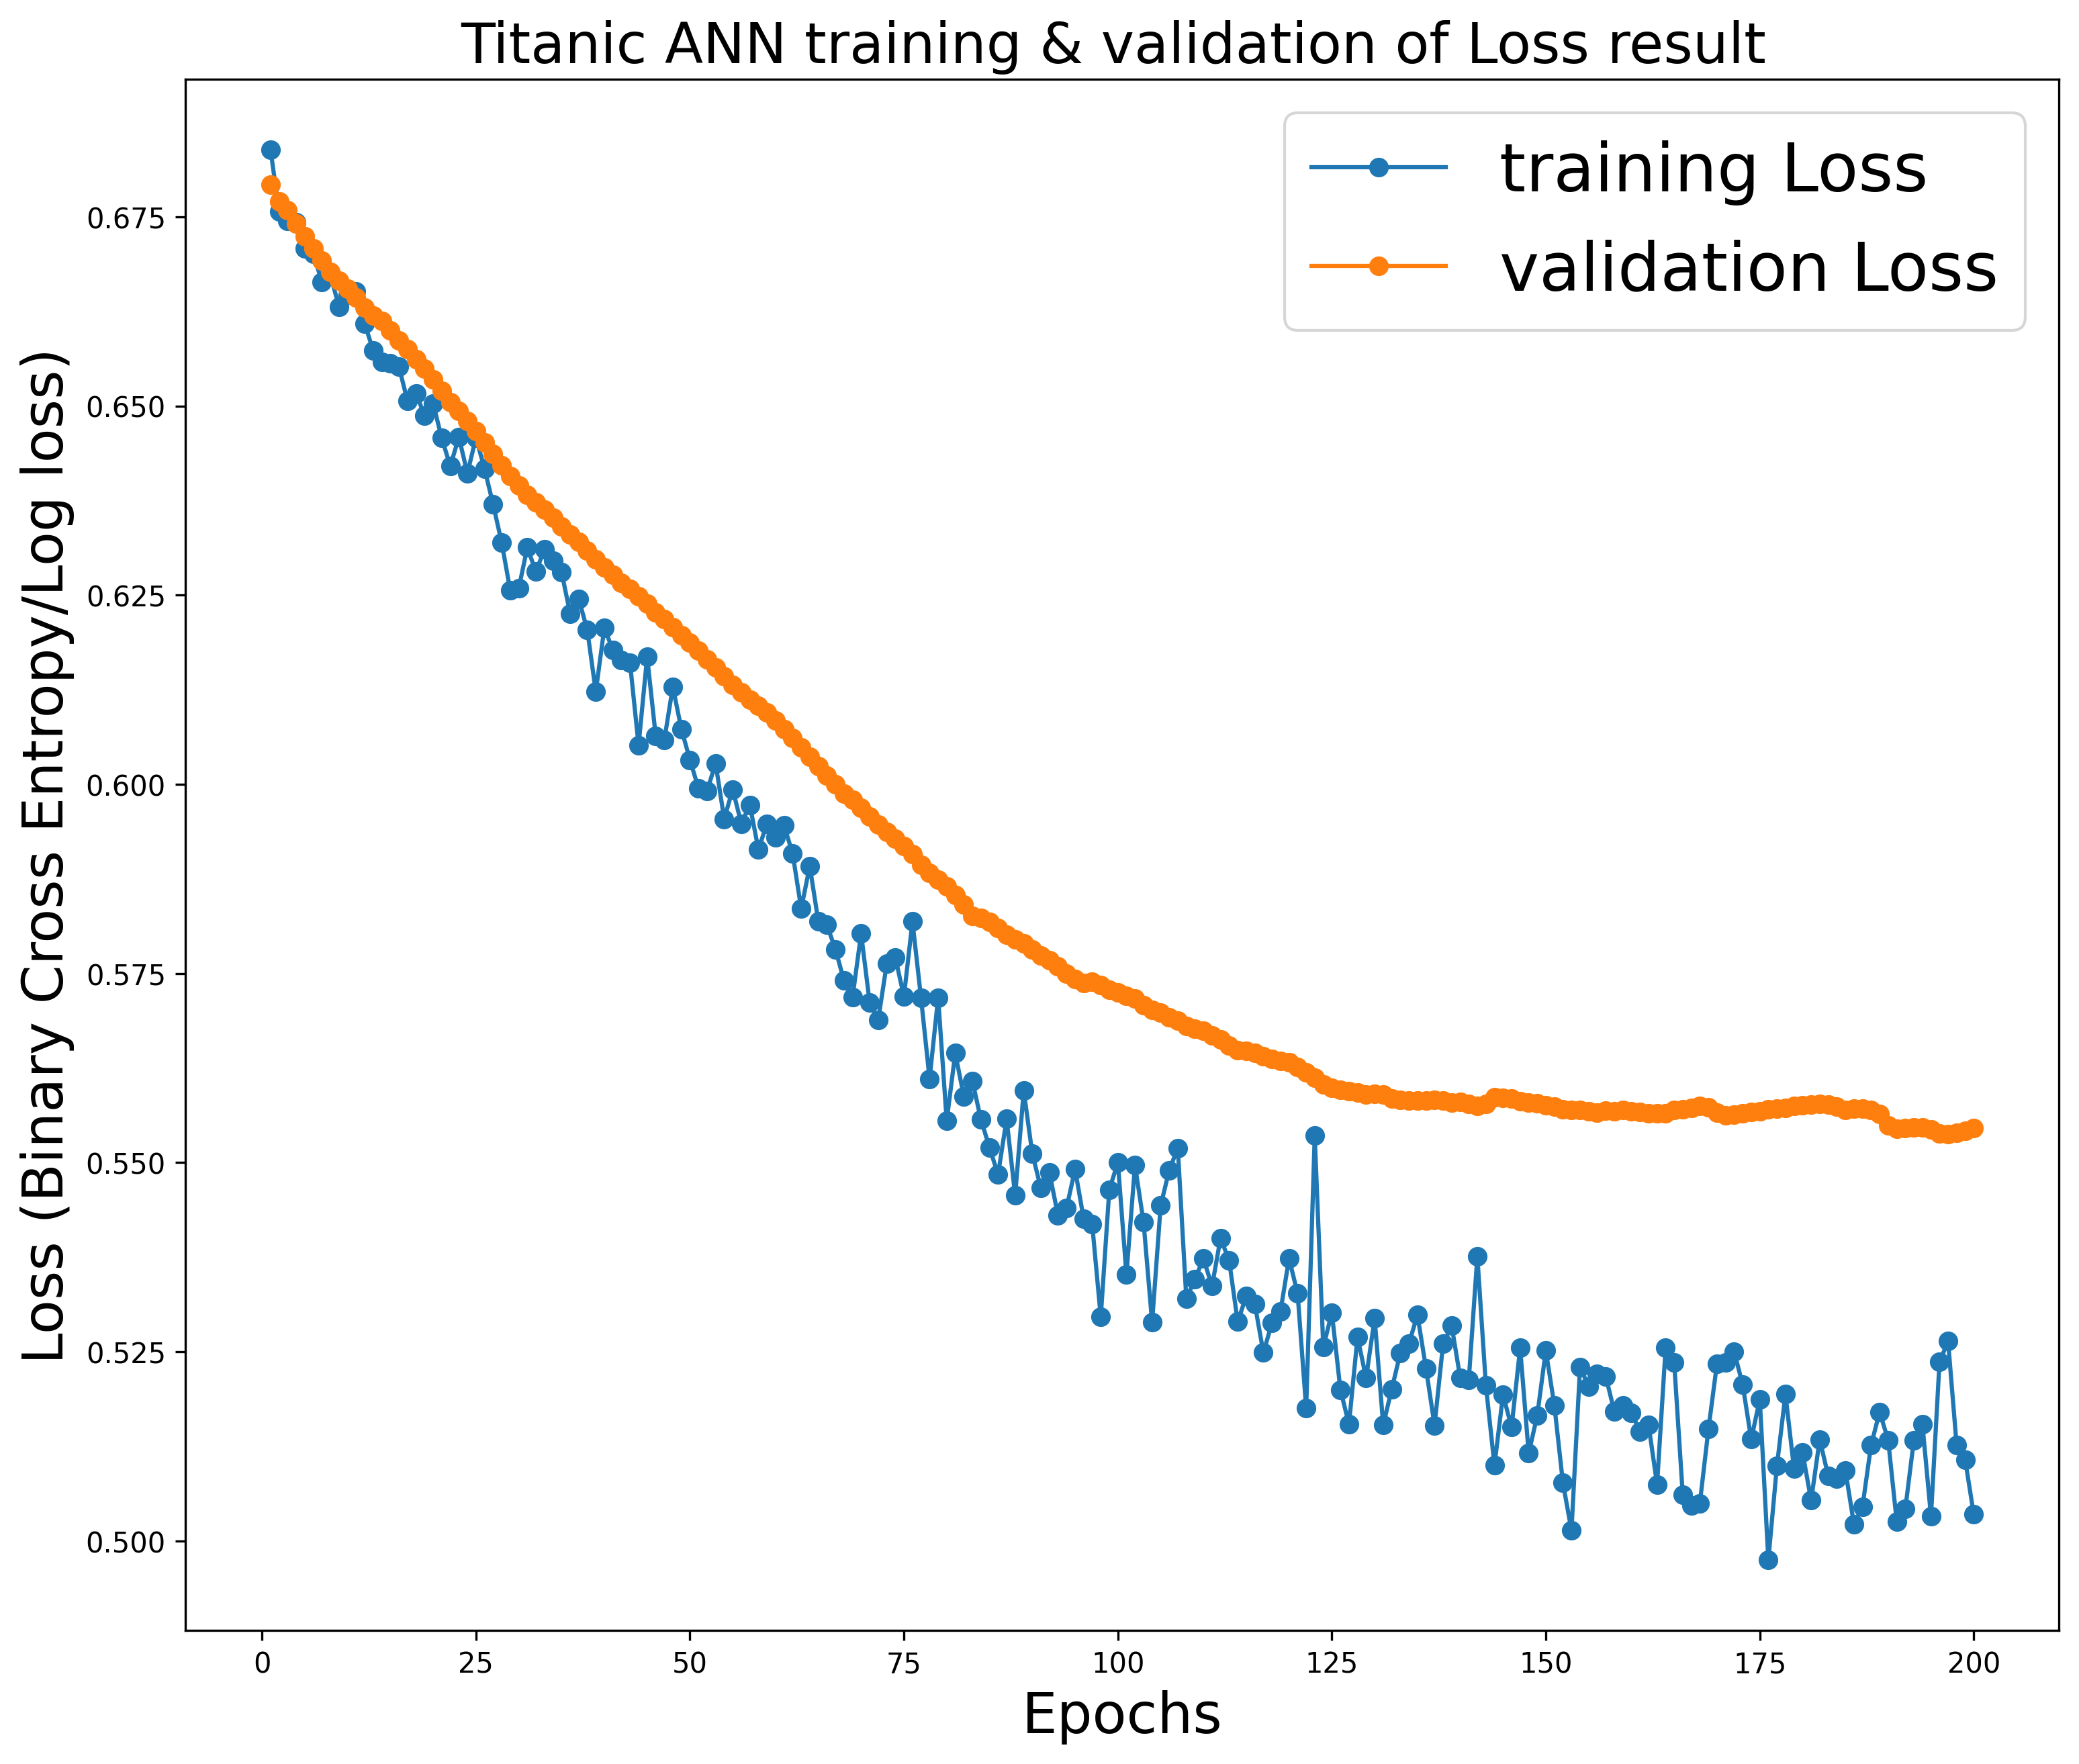

In [143]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Binary Cross Entropy/Log loss)',fontsize=20)
plt.title('Titanic ANN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

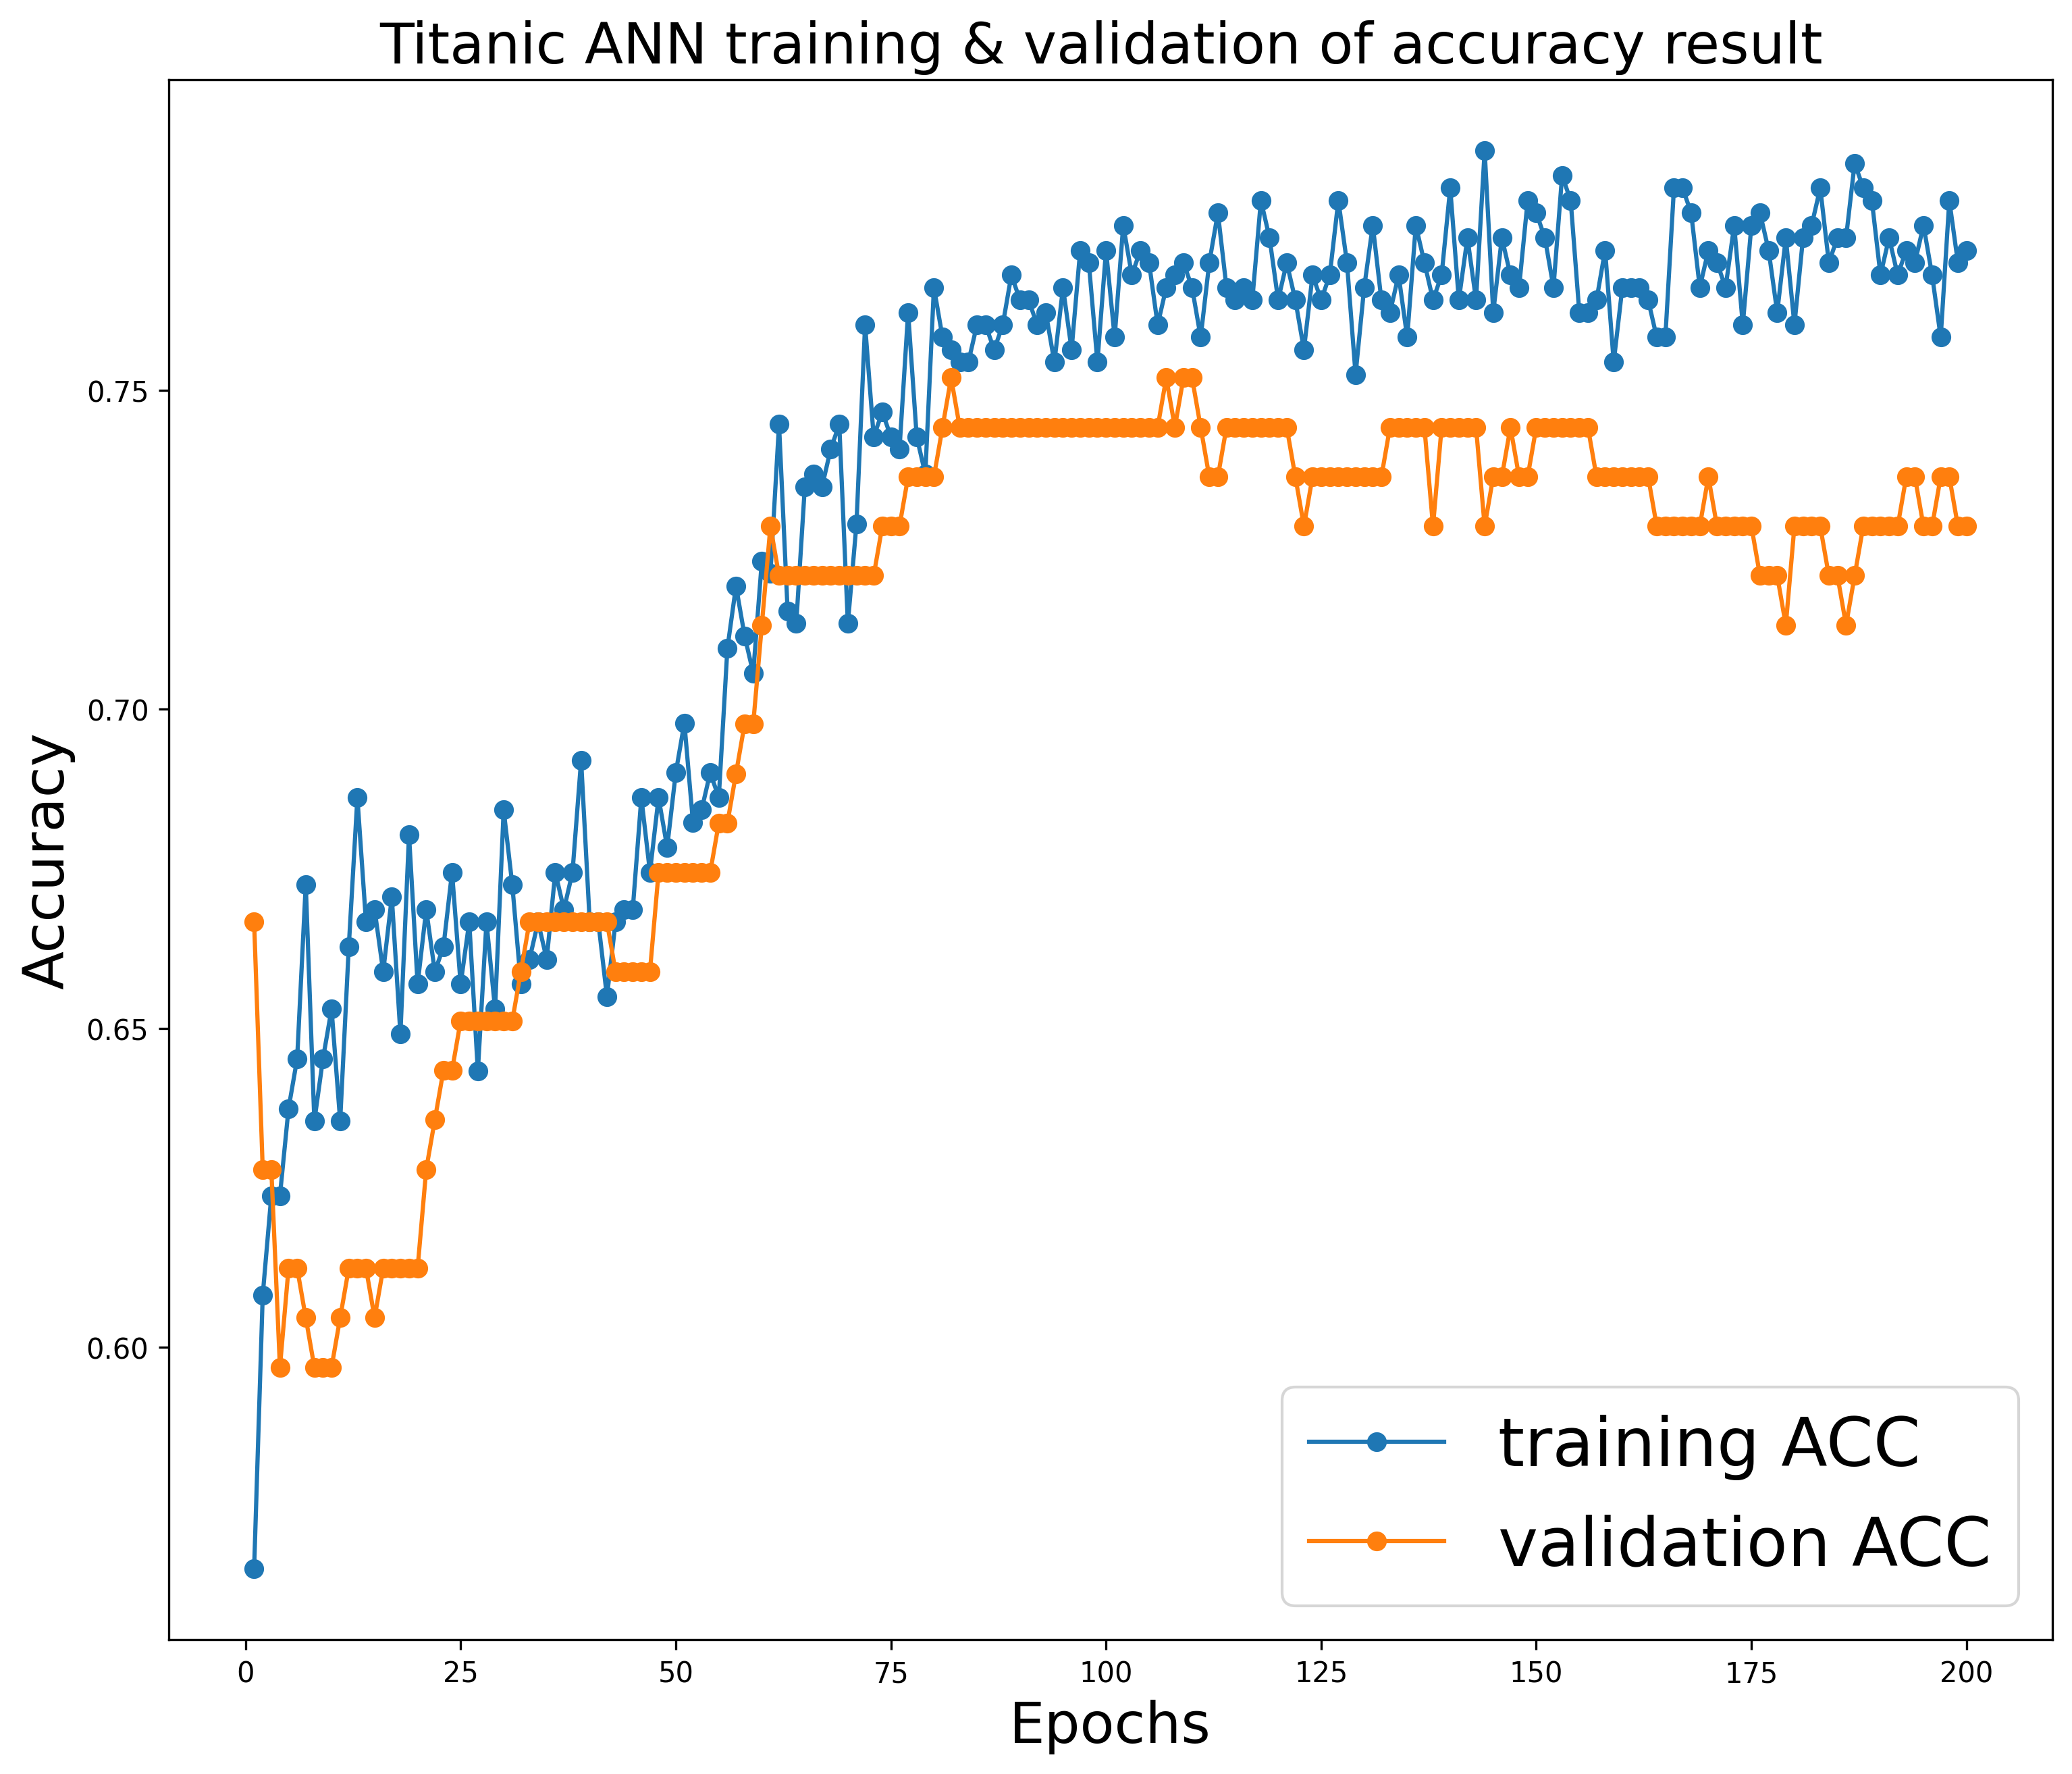

In [144]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Titanic ANN training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

In [145]:
model.save('/content/drive/MyDrive/deep learning/titanic_ANN_trained_model 1 combination val_1.h5')
print('model successfully save')

model successfully save


In [146]:
# 7.4 Restore the saved model for testing
#ANN_model=keras.models.load_model('D:/data_analysis/PyExport/titanic_ANN_trained_model.h5')
# Colab
ANN_model=keras.models.load_model('/content/drive/MyDrive/deep learning/titanic_ANN_trained_model 1 combination val_1.h5')
print('Model successfully loaded...')

Model successfully loaded...


# 8. Testing

In [147]:
# 8.1 Make prediction 
prediction=ANN_model.predict_on_batch(x_test)
prediction

array([[0.7575679 ],
       [0.5638024 ],
       [0.20084086],
       [0.41993633],
       [0.1287141 ],
       [0.27898425],
       [0.8480591 ],
       [0.17564122],
       [0.3907967 ],
       [0.2909814 ],
       [0.14115652],
       [0.28206828],
       [0.17261857],
       [0.9189718 ],
       [0.84233123],
       [0.1985332 ],
       [0.88144284],
       [0.59111965],
       [0.8699226 ],
       [0.16547577],
       [0.12410168],
       [0.1447222 ],
       [0.14821959],
       [0.14611387],
       [0.30817148],
       [0.27051714],
       [0.13917303],
       [0.11905614],
       [0.40363565],
       [0.15304306],
       [0.70091975],
       [0.46718028],
       [0.78484666],
       [0.84205663],
       [0.16454673],
       [0.44258028],
       [0.8204216 ],
       [0.14604625],
       [0.17132941],
       [0.7869749 ],
       [0.4711511 ],
       [0.17135064],
       [0.8169416 ],
       [0.16550632],
       [0.16759074],
       [0.15837042],
       [0.84872925],
       [0.823

Note: The prediction generate by ANN are values between 0 and 1, so a transformation is required before calculating the metrics and confusion matrix 

In [148]:
# 8.2 Transform the predictions to 0 and 1 
testing_prediction=(ANN_model.predict_on_batch(x_test) >= 0.5).astype('int')
testing_prediction

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
    

In [149]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 70.81
Testing f1s: 60.5
Testing pre: 72.0
Testing sen: 52.17
Testing spe: 84.78

Testing confusion matrix:
[[78 14]
 [33 36]]


In [150]:
# Tip: Quick testing with the metrics set for the model by using evaluate function
ANN_model.evaluate(x_test,y_test,batch_size=64,verbose=1)

3/3 [==============================] - 0s 5ms/step - loss: 0.6179 - accuracy: 0.7081


[0.6178840398788452, 0.7080745100975037]